<a href="https://colab.research.google.com/github/Jordanboi58/Jordanboi58.github.io/blob/main/DataAnalysis_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import re
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()


def find_product(base_url, productName, driver):
    ##print(base_url)
    driver.get(base_url)
    soup = BeautifulSoup(driver.page_source)
    sections=soup.find_all('div',attrs={'data-component-type':"s-search-result"})
    for i in sections:
        if i.find('span', attrs={'class':'a-size-medium a-color-base a-text-normal'}) == None:
            if i.find('span', attrs = {'class':'a-size-base-plus a-color-base a-text-normal'}).text in productName or productName in i.find('span', attrs = {'class':'a-size-base-plus a-color-base a-text-normal'}).text:
                ##print("here")
                return(i)

        elif i.find('span', attrs={'class':'a-size-medium a-color-base a-text-normal'}).text in productName or productName in i.find('span', attrs={'class':'a-size-medium a-color-base a-text-normal'}).text:
            ##print("here")
            return(i)

##this function gets all the prices for a specific product with model name and returns a list,
##productName has to be exact name in listing (subject to change)
def get_prices_amazon(productName):
    productNameUrl = productName.replace(' ', '+')
    productNameUrl = productNameUrl.replace(',', '%2C')
    productNameUrl = productNameUrl.replace('/', '%2F')
    ##print(productName)
    base_url = 'https://amazon.co.uk/s?k=' + productNameUrl ##type inproduct
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    target = find_product(base_url, productName, driver)
    linkExt = target.find('a', attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
    ##print(linkExt)
    link='https://www.amazon.co.uk'+re.search('href.*?>',str(linkExt)).group()[6:-2]

    link = link.replace('amp;','')
    ##print(link)
    driver.get(link)
    soup = BeautifulSoup(driver.page_source)
    linkExt = soup.find('a',attrs={'class':'a-touch-link a-box olp-touch-link'})
    if linkExt == None:
        return [float(soup.find('span', attrs = {'class':'a-offscreen'}).text[1:])]

    else:

        link='https://www.amazon.co.uk'+re.search('href.*?>',str(linkExt)).group()[6:-2]

        ##print(link)
        driver.get(link)
        soup = BeautifulSoup(driver.page_source)

        prices=[]

        allOffers = soup.find('div', attrs = {'id':'all-offers-display-scroller'})




        pinnedOffer = allOffers.find('div', attrs = {'id':'aod-pinned-offer'})

        prices.append(float(pinnedOffer.find('span', attrs = {'class':'a-offscreen'}).text[1:].replace(',','')))

        aodOffers = allOffers.find('div',attrs = {'id':'aod-offer-list'})

        for i in aodOffers.find_all('div', attrs = {'id':'aod-offer'}):
            if i.find('h5').text.replace(' ','') == "New" or i.find('h5').text.replace(' ','').endswith('VeryGood') or i.find('h5').text.replace(' ','').endswith('LikeNew'):
                prices.append(float(i.find('span',attrs = {'class':'a-offscreen'}).text[1:].replace(',','')))

        return(prices)



def get_ebay_prices(productName):
    ##fetch all the different classes of prices for given products
    productNameUrl = productName.replace(' ', '+')
    productNameUrl = productNameUrl.replace(',', '%2C')
    productNameUrl = productNameUrl.replace('/', '%2F')

    base_url = 'https://www.ebay.co.uk/sch/i.html?_nkw=' + productNameUrl ##type inproduct
    ##print(base_url)
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

    driver.get(base_url)
    soup = BeautifulSoup(driver.page_source)
    sections = soup.find_all('li', attrs = {'class':'s-item s-item__pl-on-bottom'})
    prices = []

    for i in sections:
        ##print(similar(i.find('span',attrs={'role':'heading'}).text, productName))
        if i.find('span', attrs={'class':'SECONDARY_INFO'}).text == "Brand new" or i.find('span', attrs={'class':'SECONDARY_INFO'}).text == "New (other)":
            if "to " in i.find('span', attrs = {'class':'s-item__price'}).text:
                x = [float(y[1:]) for y in i.find('span', attrs = {'class':'s-item__price'}).text.split(" to ")]
                prices.append(x[0])
            else:
                prices.append(float(i.find('span', attrs = {'class':'s-item__price'}).text[1:].replace(',','')))
    return(prices)

In [ ]:
amazonPrices = get_prices_amazon('VonHaus BBQ, Charcoal Barbecue, Portable BBQ Use Anywhere In Your Garden, For Grilling Meat, Fish & Vegetables, With Side Tables & Temperature Gauge For The Perfect Barbecue Every Time')
##print(amazonPrices)
ebayPrices = get_ebay_prices('VonHaus BBQ, Charcoal Barbecue, Portable BBQ Use Anywhere In Your Garden, For Grilling Meat, Fish & Vegetables, With Side Tables & Temperature Gauge For The Perfect Barbecue Every Time')
prices = amazonPrices+ebayPrices
print(amazonPrices)
print(ebayPrices)

[219.99, 229.99]
[]


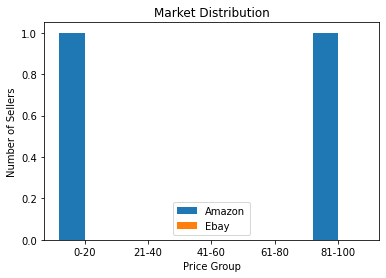

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Per20 = np.percentile(prices,20)
Per40 = np.percentile(prices,40)
Per60 = np.percentile(prices,60)
Per80 = np.percentile(prices,80)

amazonPercentiles=[0,0,0,0,0]
ebayPercentiles=[0,0,0,0,0]

for i in amazonPrices:
    if i<Per20:
        amazonPercentiles[0]+=1
    elif i<Per40:
        amazonPercentiles[1]+=1
    elif i<Per60:
        amazonPercentiles[2]+=1
    elif i<Per80:
        amazonPercentiles[3]+=1
    else:
        amazonPercentiles[4]+=1

for i in ebayPrices:
    if i<Per20:
        ebayPercentiles[0]+=1
    elif i<Per40:
        ebayPercentiles[1]+=1
    elif i<Per60:
        ebayPercentiles[2]+=1
    elif i<Per80:
        ebayPercentiles[3]+=1
    else:
        ebayPercentiles[4]+=1

labels=["0-20","21-40","41-60","61-80","81-100"]


X_axis = np.arange(len(labels))

plt.bar(X_axis - 0.2, amazonPercentiles, 0.4, label = 'Amazon')
plt.bar(X_axis + 0.2, ebayPercentiles, 0.4, label = 'Ebay')

plt.xticks(X_axis, labels)
plt.xlabel("Price Group")
plt.ylabel("Number of Sellers")
plt.title("Market Distribution")
plt.legend()
plt.show()
##print([np.percentile(prices,0),Per20,Per40,Per60,Per80,np.percentile(prices,100)])

In [ ]:
print(str(round(Per20,0)))

222.0


In [ ]:
def makeGraph(amazonPrices,ebayPrices,prices,productName):
    Per20 = np.percentile(prices,20)
    Per40 = np.percentile(prices,40)
    Per60 = np.percentile(prices,60)
    Per80 = np.percentile(prices,80)

    amazonPercentiles=[0,0,0,0,0]
    ebayPercentiles=[0,0,0,0,0]

    for i in amazonPrices:
        if i<Per20:
            amazonPercentiles[0]+=1
        elif i<Per40:
            amazonPercentiles[1]+=1
        elif i<Per60:
            amazonPercentiles[2]+=1
        elif i<Per80:
            amazonPercentiles[3]+=1
        else:
            amazonPercentiles[4]+=1

    for i in ebayPrices:
        if i<Per20:
            ebayPercentiles[0]+=1
        elif i<Per40:
            ebayPercentiles[1]+=1
        elif i<Per60:
            ebayPercentiles[2]+=1
        elif i<Per80:
            ebayPercentiles[3]+=1
        else:
            ebayPercentiles[4]+=1

    Per0to20 = str(round(np.percentile(prices,0),1)) + "-" + str(round(Per20,1))
    Per20to40 = str(round(Per20,1)) + "-" + str(round(Per40,1))
    Per40to60 = str(round(Per40,1)) + "-" + str(round(Per60,1))
    Per60to80 = str(round(Per60,1)) + "-" + str(round(Per80,1))
    Per80to100 = str(round(Per80,1)) + "-" + str(round(np.percentile(prices,100),1))

    labels=[Per0to20,Per20to40,Per40to60,Per60to80,Per80to100]


    X_axis = np.arange(len(labels))

    fig = plt.figure()
    plt.bar(X_axis - 0.2, amazonPercentiles, 0.4, label = 'Amazon')
    plt.bar(X_axis + 0.2, ebayPercentiles, 0.4, label = 'Ebay')

    plt.xticks(X_axis, labels)
    plt.xlabel("Price Group")
    plt.ylabel("Number of Sellers")
    plt.title(productName)
    plt.legend()
    plt.show()
    print([np.percentile(prices,0),Per20,Per40,Per60,Per80,np.percentile(prices,100)])
    return(fig)


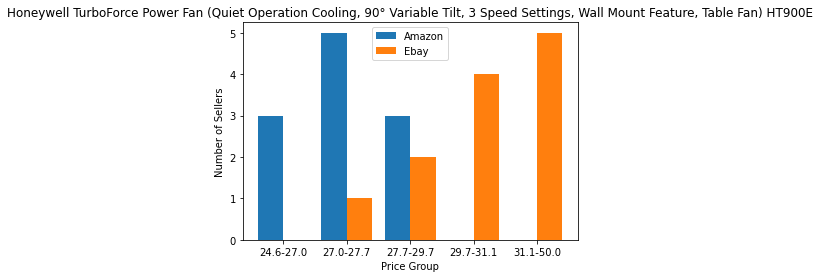

[24.65, 26.989999999999995, 27.734, 29.67, 31.088, 49.99]
error with Russell Hobbs 9" Inch, Portable Desk Fan, 2 Speeds, Wide-Angled Oscillation, Quiet Operation, Perfect for Bedroom or Office, White - RHPDF0921 criteria not met
error with Generic 16 OSCILLATING PEDESTAL AIR COOLING ELECTRIC FAN EXTENDABLE ADJUSTABLE STAND, White criteria not met
error found in pdf 0graph 3 BRITA MAXTRA+ replacement water filter cartridges, compatible with all BRITA jugs -reduce chlorine, limescale and impurities for great taste - 6 pack
error with Russell Hobbs 29" Inch, Lightweight, Tower Fan, 3 Speeds, 75° Oscillation, Powerful Airflow, Quiet Operation, Timer, Perfect for Home or Office, White- RHTF2921 criteria not met
error with Zanussi 12" Inch, Lightweight, Portable Desk Fan, 3 Speed Settings, Wide-Angled Oscillation, Powerful Airflow, Quiet Operation, Perfect for Bedroom or Office, Black - ZNPDF1221B criteria not met


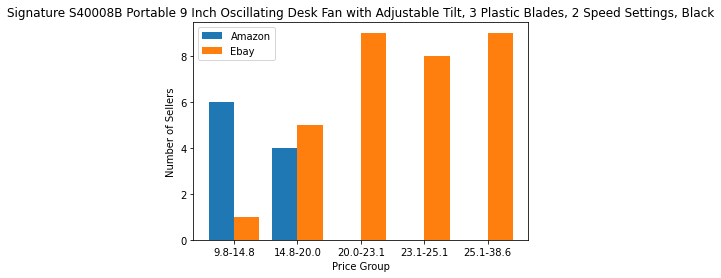

[9.84, 14.84, 19.99, 23.128, 25.101999999999997, 38.61]
error with VersionTech Hand Held Fan,Portable Handheld USB Rechargeable Fans with 3 Speeds,Battery Operated Electric Powered Mini Fan Foldable Desk Desktop Fans for Home Office Ceiling Travel Ceiling Black criteria not met
error found in pdf 0graph 8 Utopia Bedding Fitted Sheet King, White - Deep Pocket 14 inch (35 cm) - Easy Care - Soft Brushed Microfibre Fabric - Shrinkage and Fade Resistant - Bottom Sheet
error found in pdf 0graph 9 JISULIFE Handheld Fan, 3 IN 1 Mini Hand Fan, Portable USB Rechargeable Small Pocket Fan, Battery Operated Fan [14-21 Working Hours] with Power Bank, Flashlight Feature for Women,Travel-Pink
error with Zanussi 16" Inch, Lightweight, Pedestal Fan, 3 Speeds, Wide-Angled Oscillation, Powerful Airflow, Adjustable Height, Black - ZNPPF1621B criteria not met


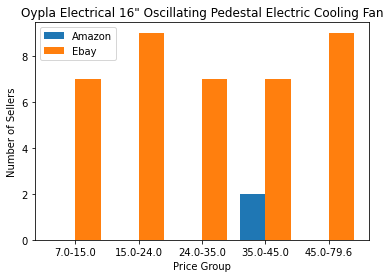

[6.99, 14.99, 23.95, 34.99, 44.99, 79.65]


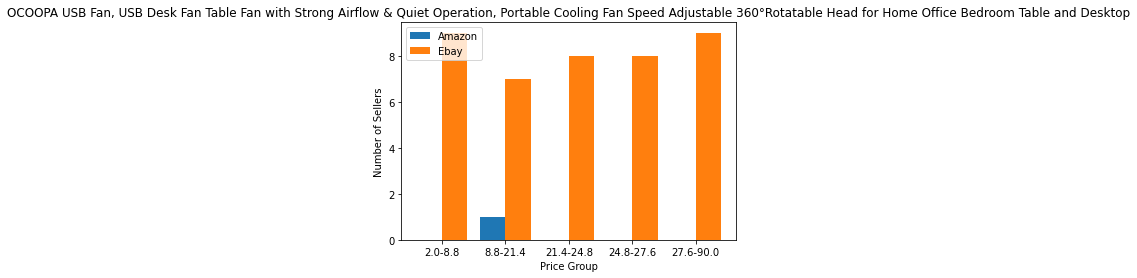

[1.99, 8.758000000000001, 21.422, 24.842, 27.560000000000002, 89.99]
error with Portable Neck Fan, Neck Fans Rechargeable 3-Speeds Bladeless Fan, USB Powered Hands-Free Mini Fan 3000mAh Neck Fans for Women Rechargeable,360 Degrees Airflow, for Outdoor Indoor-White criteria not met
error with LEVOIT Tower Fan, 28 dB Quiet Electric Cooling Fan for Bedroom, 90° Oscillating Bladeless Fan with Remote, 5 Speeds, 4 Modes, 12H Timer, 36 Inch Standing Fan for Home Office, Amazon Exclusive criteria not met


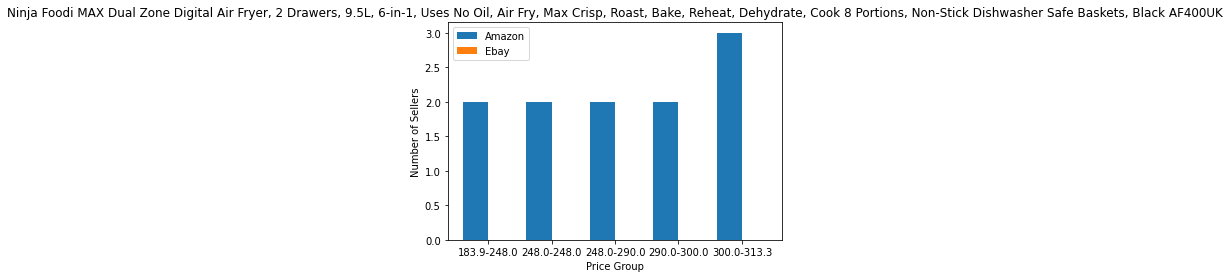

[183.92, 247.99, 248.0, 289.99, 299.95, 313.33]
error with gaiatop Mini Handheld Fan, Dual Motors Powerful Desk Fan with Base, Cute Design 3 Speed Personal Small Portable Fan, Lightweight Makeup Rechargeable USB Fan for Stylish Girl Women Men Indoor Outdoor criteria not met
error with Pro Breeze Tower Fan Oscillating 40-inch Tall Fan, Powerful Electric Fan 45W, Bladeless Fan with Remote, 3 Speeds, 4 Modes, 15 Hour Timer, Cooling Quiet Fan for Bedroom, Room, Home Office Cooling Fan criteria not met
error with Zanussi 13" Inch, Lightweight, Portable Mini Tower Fan, 3 Speeds, Wide-Angled Oscillation, Powerful Airflow, Quiet Operation, Perfect For Homes Or Office, Black - ZNTF1321B criteria not met
error with Meaco MeacoFan 1056 Air Circulator - Powerful, Energy Efficient, Low Energy, Quiet cooling desk fan for bedroom, home and office, Oscillating, Remote Controlled criteria not met
error with Amazon Basics Vacuum Compression Storage Bags with Airtight Valve and Hand Pump, Large, 5-Pack, 

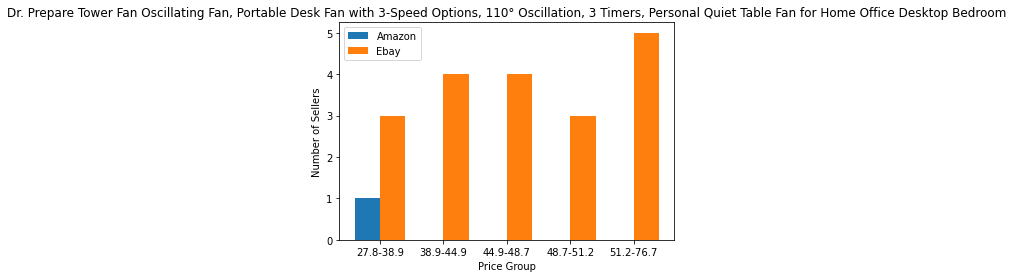

[27.82, 38.942, 44.92400000000001, 48.73, 51.15, 76.73]
error with Schallen 16" Electric Oscillating Floor Standing Tall Pedestal Air Cooling Fan (Black) criteria not met
error with Generic Electrical 16-Inch Oscillating Pedestal Stand Fan - 3 Settings criteria not met
error with 16" Standing Fan - 3 Speed Settings - Oscillating criteria not met
error with MOREASE Neck Fan, Portable Neck Fan Rechargeable Personal Fan, 3000mAh USB Wearable Hands Free Fan, 4+1 Speeds Cooling Fans, Leafless Hanging Bladeless Mini Neck Fan for Women Men Outdoor (W+) criteria not met


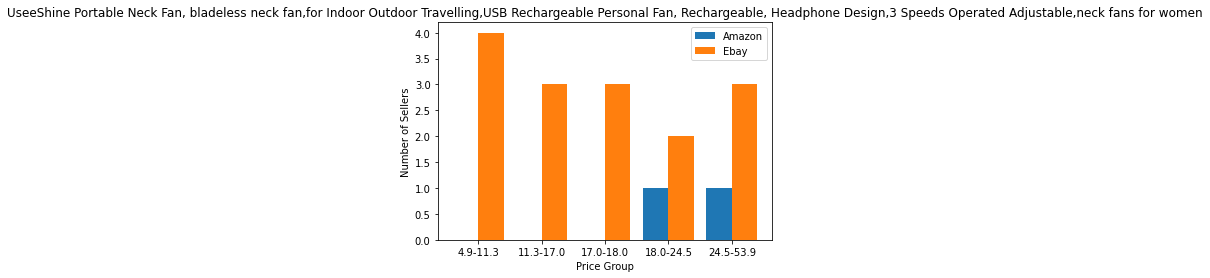

[4.89, 11.276, 17.042, 17.996, 24.528, 53.88]
error found in pdf 0graph 28 Russell Hobbs 4" Inch, Lightweight, Compact, Portable, USB Desk Fan, Quiet Operation, 1m Cord, Black - RHUSBF0421B
done
['UseeShine Portable Neck Fan, bladeless neck fan,for Indoor Outdoor Travelling,USB Rechargeable Personal Fan, Rechargeable, Headphone Design,3 Speeds Operated Adjustable,neck fans for women']
error found in pdf 1graph 29 AstroAI Mini Fridge 4 Litre, 6 Can Portable AC+DC Power Cooler & Warmer, Small Fridge for Bedrooms, Cars, Offices, Travel; Skincare, Makeup, Cosmetics, Food (Black)
error with Russell Hobbs Mini Fridge RH4CLR1001 4L/6 Can Portable Mini Cooler & Warmer for Drinks, Cosmetics/Makeup/Skincare, AC/DC Power, Retro Style, White, For Bedroom, Home, Caravan, Car criteria not met
error with AstroAI Mini Fridge 6 Litre / 8 Can | Cooler and Warmer | AC/DC | Small Fridge for Bedrooms, Car, Drinks, Beauty, Skincare, Travel criteria not met
error found in pdf 1graph 32 Parkland® Portable Sin

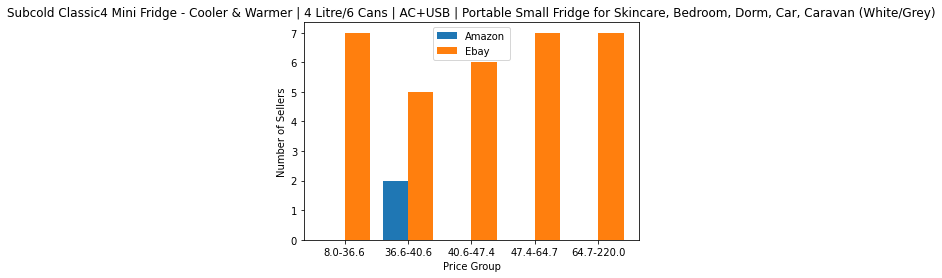

[7.99, 36.59400000000001, 40.58200000000001, 47.39000000000001, 64.67000000000002, 219.99]
error with SENSIOHOME 10L Mini Fridge Cooler & Warmer | AC+DC Power - 12v, UK & EU Plug | Compact, Portable and Quiet, For Home, Bedroom, Car, Holiday, Food Drinks Makeup (Black) criteria not met
error found in pdf 1graph 35 Subcold Pro4 Luxury Mini Fridge Cooler | 4 Litre / 6 Cans | AC and Exclusive USB Power Option | Portable Small Fridge for the Office, Bedroom, Car, Travel, Skincare & Cosmetics (White)
error found in pdf 1graph 36 Subcold Pro6 Luxury Mini Fridge Cooler | 6 Litre / 8 Cans | AC and Exclusive USB Power Option | Portable Small Fridge for the Office, Bedroom, Car, Travel, Skincare & Cosmetics (White)
error with Mini Fridge 15 Liter/21 Cans, Small Drink Fridge Portable for Bedroom or Car (AC/DC), Thermoelectric Refrigerator for Skincare Beauty, Cooler & Warmer with ECO Quiet Mode criteria not met
error with Cookology CCFZ99WH Freestanding 99 Litre, Chest Freezer Suitable for Outbui

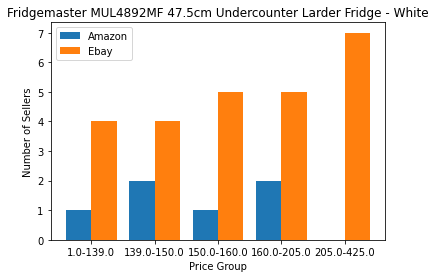

[0.99, 139.0, 149.99, 159.99, 204.99, 425.0]
done
['Fridgemaster MUL4892MF 47.5cm Undercounter Larder Fridge - White']
error found in pdf 2graph 48 K-MART Water Bottle 1000ml Sports Water Bottle with Motivational Time Marker & Straw, Dishwasher Safe Leak-proof Drink Bottle BPA Free Non-Toxic Tritan Material 1 Click Open for Running Gym (Grey)
error with Milestone Camping 83150 Electric Air Pump/Inflate Or Deflate Airbeds, Paddling Pools & Other Toys / AC240V-130W / Portable & Lightweight/Includes 3 Nozzles criteria not met
error with Science In Sport SIS Clear Sports Water Bottle, Plastic Water Bottle, Black Logo, Transparent Colour, 800 ml, Design May Vary criteria not met
error found in pdf 2graph 51 K-MART Water Bottle 1L Sports Water Bottle with Motivational Time Marker, Dishwasher Safe Leak-proof Drink Bottle BPA Free Non-Toxic for Running,cycling, Gym, School & Office (Blue)
error with schone® Ice Blocks 200ml x 3 – Coolant that Simply Stays Frozen for Longer – 12+ Hrs Chilled - 

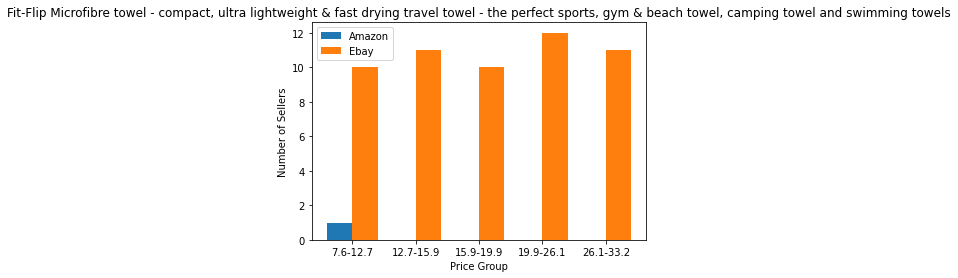

[7.64, 12.678, 15.934000000000001, 19.94, 26.064, 33.2]
error with Mitre Impel L30P Football, Highly Durable, Shape Retention criteria not met
error with Gritin Resistance Bands, [Set of 5] Skin-Friendly Resistance Fitness Exercise Loop Bands with 5 Different Resistance Levels - Carrying Case Included - Ideal for Home, Gym, Yoga, Training criteria not met
error with Super Sparrow Stainless Steel Water Bottle - 350ml / 500ml / 620ml / 750ml / 1000ml - Vacuum Insulated Metal Water Bottle - Standard Mouth Flask - BPA Free - Straw Water Bottle for Work, Gym, Travel, Sports criteria not met
error with Green Haven Single Blow up Camping bed |Waterproof Single Airbed Inflatable Mattress | Single Air Beds for Adults & Kids |Quick Inflatable Camping Mattress | Premium Camping Mattress Single Air Bed criteria not met
error found in pdf 2graph 58 HOMEBAY - Pack of 3/6 Small Mini Freezer Blocks Ice Packs For Cool Bags Lunch Box Camping Picnic Travel Caravan
error with Amazon Brand - Eono Microfibr

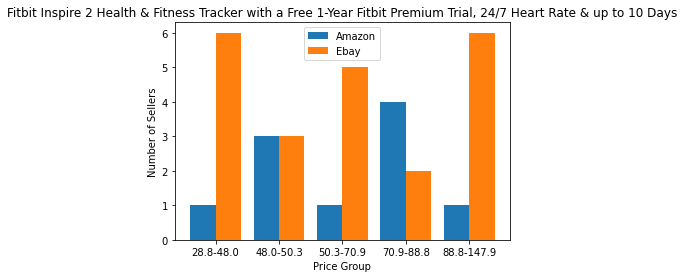

[28.76, 47.952, 50.33, 70.88999999999999, 88.78200000000001, 147.88]
error with Fitbit Charge 5 Activity Tracker with 6-months Premium Membership Included, up to 7 days battery life and Daily Readiness Score criteria not met
error with DDUO Portable Ball Pump,Air Pump Inflator Kit with Needle,Nozzle, Extension Hose Hand Pumps for Basketball Football Volleyball Water Polo Rugby Exercise Sports Ball Balloon Swim Inflatables criteria not met
error with Lewis-Plast First Aid Kit Bag - 160 Piece Survival Kits - Safety Essentials for Travel Car Home Camping Work Hiking Holiday - Pack Supplies - Medium criteria not met


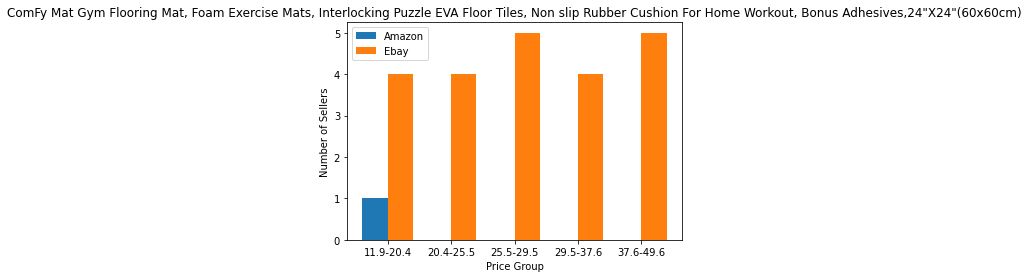

[11.94, 20.445999999999998, 25.47, 29.494, 37.622, 49.65]
error with G4GADGET Freezer Blocks Ice Brick Pack Block Blocks Freezer Cooler Bag Box Travel Picnic criteria not met


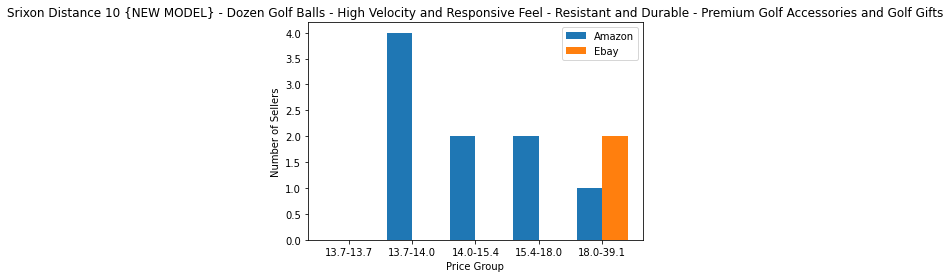

[13.67, 13.67, 14.0, 15.39, 17.98, 39.08]
error with Skipping Rope, Gritin Speed Jump Rope Soft Memory Foam Handle Tangle-free Adjustable Rope&Rapid Ball Bearings Fitness Workouts Fat Burning Exercises Boxing for Adults, Kids - Length Adjuster Included. criteria not met
error with Glamza Chamois Cream Chub Rub’ Anti Chafing Cream for Men & Women - Prevents Chaffing for Cyclists, Runners and More 50ml criteria not met
done
[]


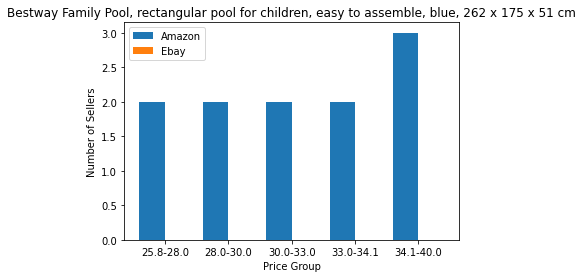

[25.78, 27.99, 29.99, 33.0, 34.09, 39.99]
error with Bestway Fill-N-Fun Paddling Pool - 48 x 10 Inches, Blue, BW55028 criteria not met
error found in pdf 3graph 80 db11 Colorful Feather Boas, 6.6ft Feather Boa for Women for Dancing Wedding Party Cosplay Halloween,with Heart Rimless Sunglasses (Pink)
error with Intex 59416NP Crystal Blue Three Ring Inflatable Paddling Pool 1.14m x 25cm criteria not met
error found in pdf 3graph 82 pecute Sprinkler Pad for Dogs & Kids -170cm, Thickened Dog Splash Mat Durable Children Water Play Toy Anti Slip, Inflatable Swimming Bathing Pool for Summer Outdoor Garden (Dia 67in)
error found in pdf 3graph 83 FurReal friends Cinnamon, My Stylin’ Pony Toy, Electronic Pet, 80+ Sounds and Reactions; 26 Accessories; Ages 4 and Up, Multicolor, 35 cm
error with CRAYOLA SuperTips Washable Markers - Assorted Colours (Pack of 24) | Premium Felt Tip Pens That Can Easily Wash Off Skin & Clothing | Ideal for Kids Aged 3+ criteria not met
error with Asmodee | Dobble | C

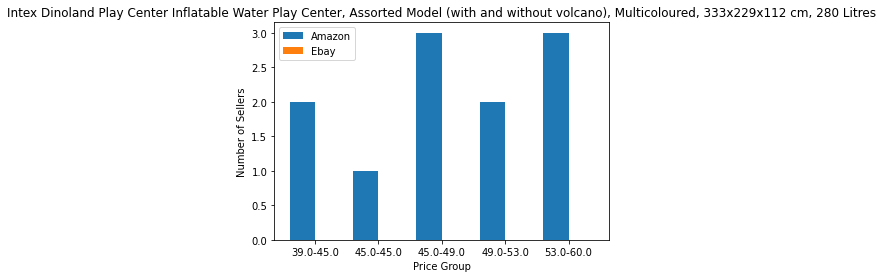

[38.99, 44.98, 44.99, 48.99, 52.99, 59.99]
error with Get Wild 4 UNO, W2087 criteria not met
error with COOZi 2m Premium Family Paddling Pool for Kids – Easy to Use Inflatable Kids Swimming Pool with Self-Adhesive Repair Patch | Rectangular Paddling Pool for Adults & Kids | Paddling Pool for Toddlers criteria not met
error with Trimits Marabou Feather Boa Fancy Dress for Parties, Festivals, Pride, Hen Do, Stag Do, Halloween, Christmas, Ivory, 1.8 m x 12 cm criteria not met
error with Zoggs Swimming Aid Children's Float Arm Bands criteria not met
error with Snazaroo Classic Face and Body Paint, White,Professional Water Based, Single Cake Makeup Supplies for Adults, Kids and Special FX, 18.8 g (Pack of 1) criteria not met
error with Tropical Party Bunch O Balloons 100 plus Rapid-Filling Self-Sealing Water Balloons, Foilbag (3 Stems) criteria not met
error with Bestway Summer Set Paddling Pool | Swimming Pool Toys, Water Pool Toys, Inflatable Baby, Kids Pool for Outdoors, 40inch criteria 

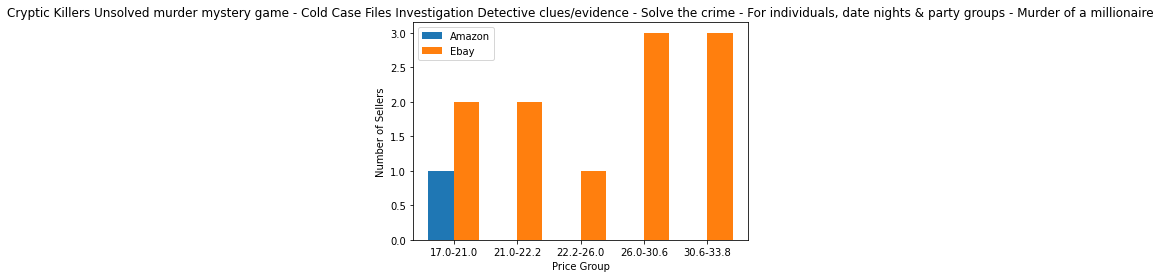

[16.99, 20.97, 22.174, 25.99, 30.566000000000003, 33.85]
error with Bandai Tamagotchi Original Rainbow Shell | Tamagotchi Original Cyber Pet 90s Adults And Kids Toy With Chain | Retro Virtual Pets Are Great Boys And Girls Toys Or Gifts For Ages 8+ criteria not met
error found in pdf 3graph 105 CYCFMYYLY Colorful Feather Boa, 2 Meters Long - Approx 80 G. for Crafts Fluffy Pink Feather Boa DIY Girl's Fancy Dress Accessories Christmas Carnival, Dancing Wedding Party
error with Laeto Summertime Days Childrens Play Sand 10KG Bag For Kids Non Toxic Soft Playsand Idea For Playing in sand pits criteria not met
done
[]


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
target_sections=["Sports & Outdoors","Home & Kitchen","Large Appliances","Toys & Games"]
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
base_url = 'https://www.amazon.co.uk/Best-Sellers/zgbs'
driver.get(base_url)
soup = BeautifulSoup(driver.page_source)
tree = soup.find('div',attrs= {'class':'_p13n-zg-nav-tree-all_style_zg-browse-group__88fbz'})
sections = tree.find_all('a')
pdfcount = 0
graphcount = 0
for i in sections:
    ##print(i)
    if i.text in target_sections:
        target_url = 'https://www.amazon.co.uk'+re.search('href.*?>',str(i)).group()[6:-2]
        driver.get(target_url)
        targetPage = BeautifulSoup(driver.page_source)
        products = targetPage.find_all('div', attrs = {'class':'_cDEzb_p13n-sc-css-line-clamp-3_g3dy1'})
        pdf = PdfPages(i.text.replace(' ','_')+'.pdf')
        txt = open(i.text+".txt","w")
        for j in products:
            try:
                amazonPrices = get_prices_amazon(j.text)
                ebayPrices = get_ebay_prices(j.text)
                for k in ebayPrices:
                    if abs(np.mean(amazonPrices)-k)<np.mean(amazonPrices)*0.5:
                        ebayPrices.remove(k)
                prices = amazonPrices + ebayPrices
                meanPrice = np.mean(prices)
                productList = []
                if len(prices)>=10 and max(prices) - min(prices) >= 0.4 * meanPrice and meanPrice > 15 and np.var(prices) >= 0.2 * meanPrice:
                    fig = makeGraph(amazonPrices,ebayPrices,prices,j.text)
                    txt.write(j.text)
                    pdf.savefig(fig)
                    productList.append(j.text)
                else:
                    print("error with " + j.text + " criteria not met")

            except:
                print("error found in pdf " + str(pdfcount) + "graph " + str(graphcount) + " " + j.text)
            graphcount+=1
        pdf.close()
        txt.close()
        pdfcount+=1
        print("done")
        print(productList)




In [ ]:
makeGraph(amazonPrices,ebayPrices,prices,"Dots for Spots Acne Patches - Pack of 24 Translucent Hydrocolloid Pimple Patch Spot Treatment Stickers for Face and Body - Fast-Acting, Vegan & Cruelty Free Skin Care")